<a href="https://colab.research.google.com/github/yauyauua/Calculator-app/blob/master/22.11.5150_BigData%26PredictiveAnalyticsLanjut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np

# Memuat dataset
from google.colab import files
uploaded = files.upload()  # Unggah file heart_disease.csv

# Membaca file CSV
data = pd.read_csv('heart_disease.csv')


Saving heart_disease.csv to heart_disease.csv


In [3]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = '/content/heart_disease.csv'  # Ubah sesuai dengan lokasi file
data = pd.read_csv(file_path)

# Preprocessing
# Fill missing values for numerical columns with their median
numerical_columns = data.select_dtypes(include=['float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Fill missing values for categorical columns with the mode
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features and target
X = data.drop(columns=['Heart Disease Status'])
y = data['Heart Disease Status']

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print("Classification Report:")
print(report)


Accuracy: 78.81%
F1-Score: 78.69%
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1604
           1       0.84      0.71      0.77      1596

    accuracy                           0.79      3200
   macro avg       0.79      0.79      0.79      3200
weighted avg       0.79      0.79      0.79      3200



In [2]:
# Cek tipe data
print(data.dtypes)


Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object


In [4]:
# Import the necessary library to upload files
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load the dataset into a DataFrame
import pandas as pd
data = pd.read_csv('heart_disease.csv')  # Ganti dengan nama file Anda


Saving heart_disease.csv to heart_disease (1).csv


In [5]:
# Tampilkan informasi dataset
data.info()

# Cek nilai kosong
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [6]:
from sklearn.preprocessing import LabelEncoder

# Isi nilai kosong untuk kolom numerik dengan median
num_columns = data.select_dtypes(include=['float64']).columns
data[num_columns] = data[num_columns].fillna(data[num_columns].median())

# Isi nilai kosong untuk kolom kategorikal dengan mode
cat_columns = data.select_dtypes(include=['object']).columns
data[cat_columns] = data[cat_columns].fillna(data[cat_columns].mode().iloc[0])

# Encode data kategorikal menggunakan LabelEncoder
label_encoders = {}
for col in cat_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Verifikasi bahwa nilai kosong sudah ditangani
print("Missing values after processing:")
print(data.isnull().sum())


Missing values after processing:
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64


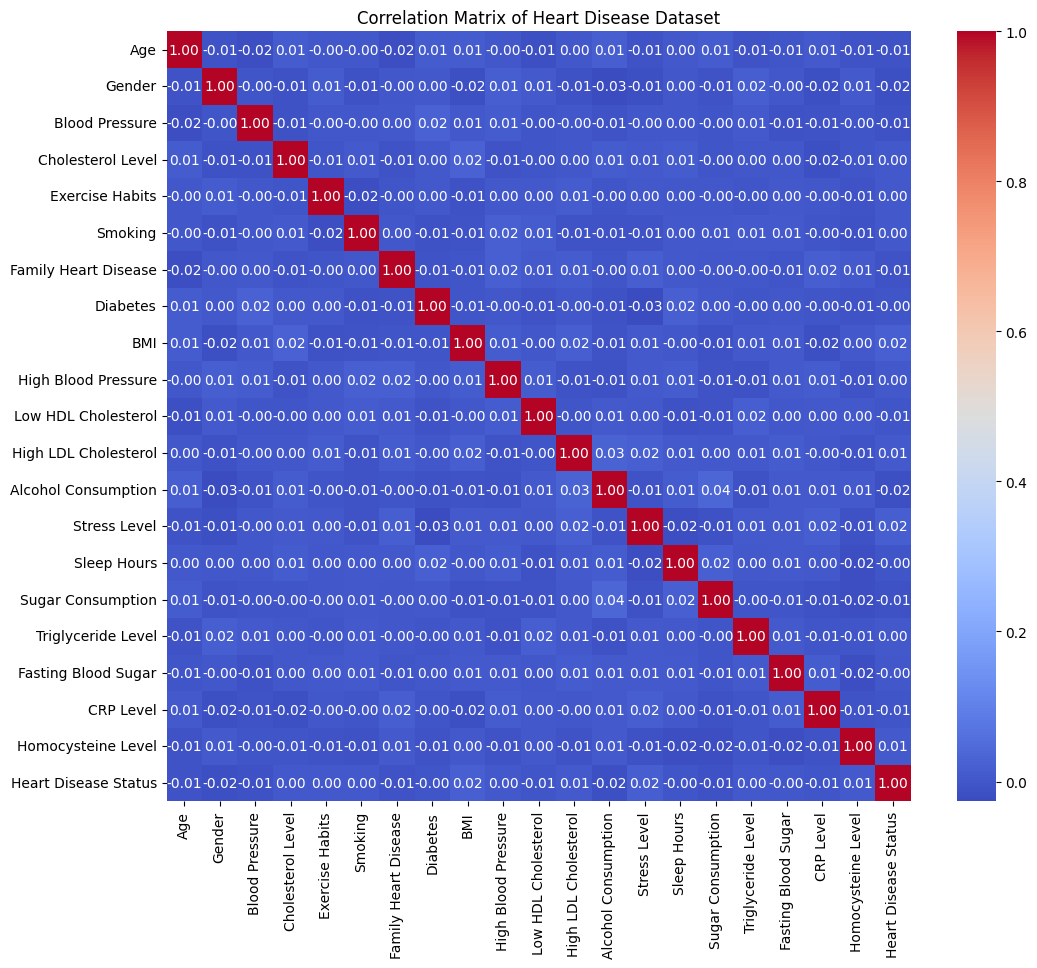

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung matriks korelasi
correlation_matrix = data.corr()

# Plot heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Heart Disease Dataset")
plt.show()


In [8]:
# Fitur yang dipilih berdasarkan domain knowledge
selected_features = [
    "Age", "Blood Pressure", "Cholesterol Level",
    "Exercise Habits", "Smoking", "Diabetes", "BMI"
]

# Target variabel
target_variable = "Heart Disease Status"

# Siapkan dataset fitur (X) dan target (y)
X = data[selected_features]
y = data[target_variable]

# Tampilkan beberapa baris dataset yang telah disiapkan
X.head(), y.head()


(    Age  Blood Pressure  Cholesterol Level  Exercise Habits  Smoking  \
 0  56.0           153.0              155.0                0        1   
 1  69.0           146.0              286.0                0        0   
 2  46.0           126.0              216.0                1        0   
 3  32.0           122.0              293.0                0        1   
 4  60.0           166.0              242.0                1        1   
 
    Diabetes        BMI  
 0         0  24.991591  
 1         1  25.221799  
 2         0  29.855447  
 3         0  24.130477  
 4         1  20.486289  ,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Heart Disease Status, dtype: int64)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Bagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Prediksi pada data uji
y_pred = rf_model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
classification_rep = classification_report(y_test, y_pred)

# Tampilkan hasil evaluasi
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1-Score (Weighted): {f1:.2f}")
print("Classification Report:")
print(classification_rep)


Random Forest Model Performance:
Accuracy: 80.25%
F1-Score (Weighted): 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1613
           1       0.00      0.00      0.00       387

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

